# Extracting stock price history using yFinance


In [2]:
import yfinance as yf

In [3]:
import pandas as pd

In [4]:
df=yf.Ticker("TSLA")

In [5]:
df1=df.history(period="max")
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [6]:
df1.reset_index(inplace=True)

In [7]:
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


<AxesSubplot: xlabel='Date'>

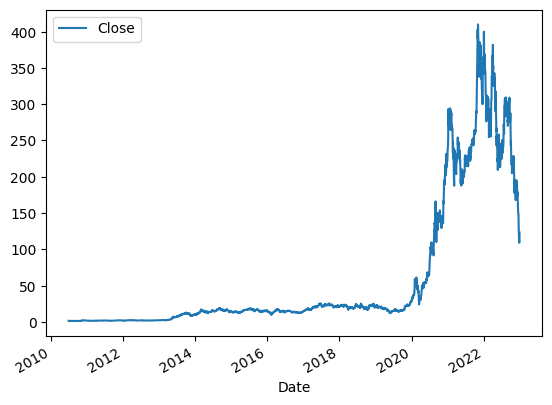

In [8]:
df1.plot("Date","Close")

# Webscraping Tesla annual revenues

In [13]:
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
l=pd.read_html(url)
print(l)

[    Tesla Annual Revenue(Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  
5                                    $7,000  
6                               

In [14]:
d=l[0]
d.head()

,Tesla Annual Revenue(Millions of US $),Tesla Annual Revenue(Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [16]:
d.rename(columns= {'Tesla Annual Revenue(Millions of US $)':'Years'}, inplace=True)

In [17]:
d.rename(columns= {'Tesla Annual Revenue(Millions of US $).1':'Revenues'}, inplace=True)

In [18]:
d.head()

,Years,Revenues
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


# Error Example

In [19]:
d.plot("Years","Revenues")

TypeError: no numeric data to plot

In [20]:
d[d.columns[1:]] = d[d.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
d.head()

,Years,Revenues
0,2021,53823.0
1,2020,31536.0
2,2019,24578.0
3,2018,21461.0
4,2017,11759.0


<AxesSubplot: xlabel='Years'>

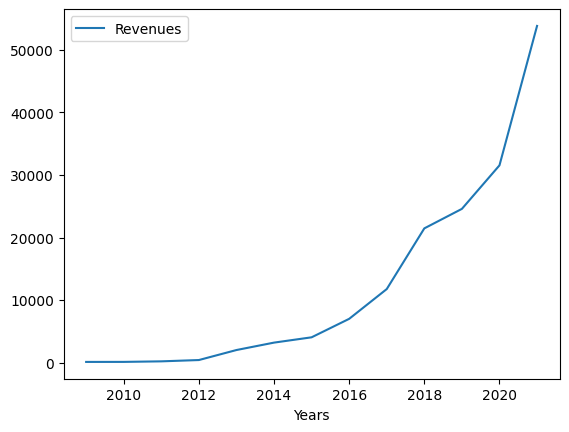

In [21]:
d.plot("Years","Revenues")